Cricket Statistics
===

### This notebook is aimed at creating a sabermetric analysis for T20 cricket using IPL season 2008-17 year data.
### Data source : https://www.kaggle.com/nowke9/ipldata

### For understanding player credit values, we are referring to Dream11 api-  all player and match statistics data available at -https://www.cricketapi.com/fantasy-api/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import plotly.tools as tls

In [2]:
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

## Exploring matches data

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


### There are 636 match results
### umpire3 field seems to have all zeroes. The field can be dropped.

In [5]:
matches.drop(['umpire3'],axis=1,inplace=True)

## Exploring deliveries data

In [6]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000
mean,318.281317,1.482188,10.142649,3.616483,0.000538,0.037498,0.004885,0.022232,0.004340,0.000066,1.222445,0.069022,1.291466
std,182.955531,0.501768,5.674338,1.807698,0.023196,0.257398,0.114234,0.200104,0.072652,0.018229,1.594509,0.349667,1.583240
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,161.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,319.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,476.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,636.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000


### For 636 matches we have 150460 deliveries with 1.2 runs per ball average

## Number of teams

In [8]:
print('Teams :',matches['team1'].nunique())

Teams : 14


In [9]:
print('Teams :',matches['team1'].unique())

Teams : ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants']


## Number of Venues

In [10]:
print('Venues Played At:',matches['city'].nunique())     

Venues Played At: 30


In [11]:
print('Venues Played At:',matches['city'].unique())     

Venues Played At: ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan]


## Toss decisions across seasons

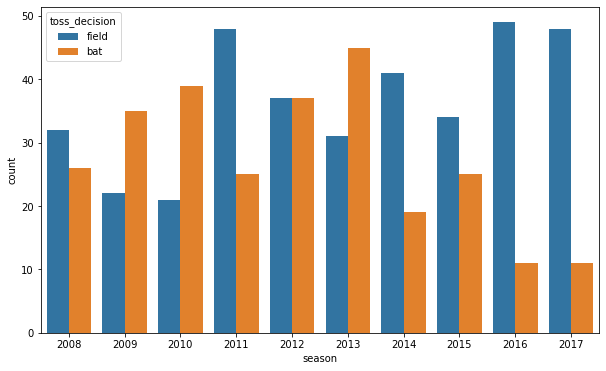

In [12]:
mlt.subplots(figsize=(10,6))
sns.countplot(x='season',hue='toss_decision',data=matches)
mlt.show()

### The decision to field first has been the highest from seasons 2014 till 2017  

## Teams that have been toss winners

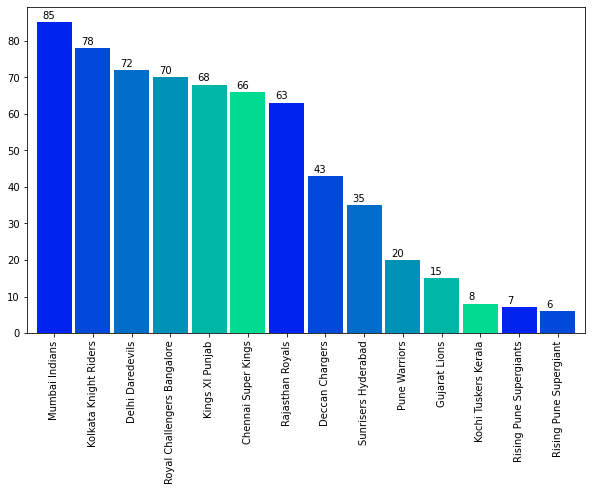

In [13]:
mlt.subplots(figsize=(10,6))
ax=matches['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('winter'))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
mlt.show()

### Mumbai Indians has won most number of tosses across seasons 
### Rising Pune Supergiant has won the least number of tosses

### How many matches per season?

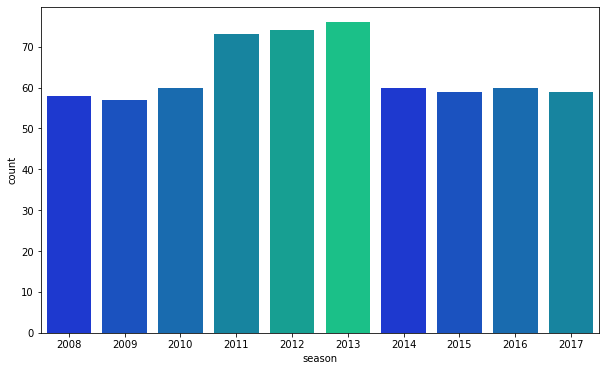

In [14]:
mlt.subplots(figsize=(10,6))
sns.countplot(x='season',data=matches,palette=sns.color_palette('winter'))  #countplot automatically counts the frequency of an item
mlt.show()

### On average, 60 matches played across seasons

## How many total runs scored across seasons?

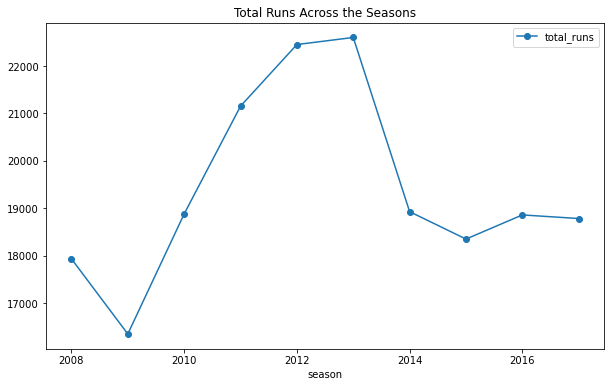

In [16]:
runs_total = matches[['id','season']].merge(deliveries, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
season=runs_total.groupby(['season'])['total_runs'].sum().reset_index()
season.set_index('season').plot(marker='o')
mlt.gcf().set_size_inches(10,6)
mlt.title('Total Runs Across the Seasons')
mlt.show()

### The highest total runs scored is during seasons 2012 and 2013

## What is the average runs per match per season

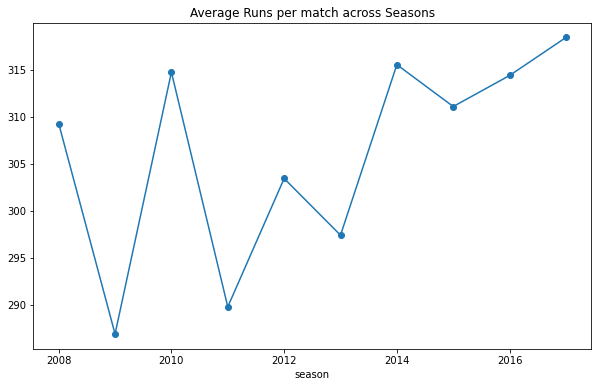

In [17]:
avgruns_each_season=matches.groupby(['season']).count().id.reset_index()
avgruns_each_season.rename(columns={'id':'matches'},inplace=1)
avgruns_each_season['total_runs']=season['total_runs']
avgruns_each_season['average_runs_per_match']=avgruns_each_season['total_runs']/avgruns_each_season['matches']
avgruns_each_season.set_index('season')['average_runs_per_match'].plot(marker='o')
mlt.gcf().set_size_inches(10,6)
mlt.title('Average Runs per match across Seasons')
mlt.show()

### The average number of runs scored per match is generally between 300 to 310 across seasons. 

## Number of boundaries across seasons

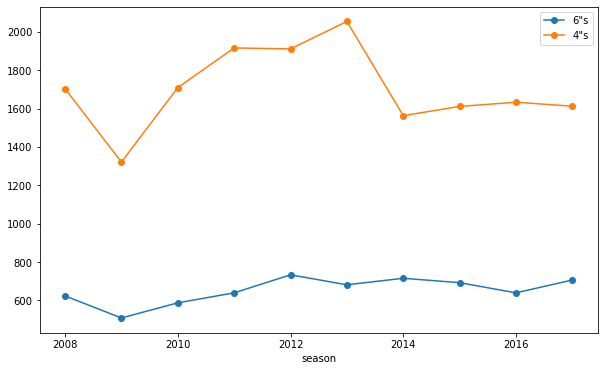

In [18]:
Season_boundaries=runs_total.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
a=runs_total.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries=Season_boundaries.merge(a,left_on='season',right_on='season',how='left')
Season_boundaries=Season_boundaries.rename(columns={'batsman_runs_x':'6"s','batsman_runs_y':'4"s'})
Season_boundaries.set_index('season')[['6"s','4"s']].plot(marker='o')
fig=mlt.gcf()
fig.set_size_inches(10,6)
mlt.show()

### The 6's have been between 600 to 700 across seasons
### The 4's have peaked in 2013 and have dropped beyond that

## Runs per over across teams

In [19]:
matches_played_byteams=pd.concat([matches['team1'],matches['team2']])
matches_played_byteams=matches_played_byteams.value_counts().reset_index()
matches_played_byteams.columns=['Team','Total Matches']
matches_played_byteams['wins']=matches['winner'].value_counts().reset_index()['winner']
matches_played_byteams.set_index('Team',inplace=True)


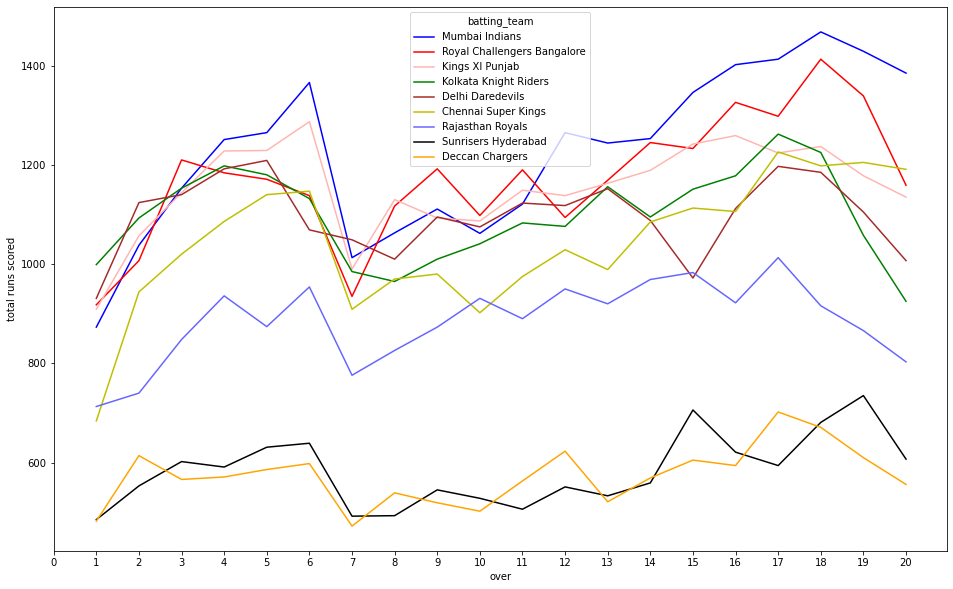

In [20]:
runs_per_over = deliveries.pivot_table(index=['over'],columns='batting_team',values='total_runs',aggfunc=sum)
runs_per_over[(matches_played_byteams[matches_played_byteams['Total Matches']>50].index)].plot(color=["b", "r", "#Ffb6b2", "g",'brown','y','#6666ff','black','#FFA500'])
x=range(21)
mlt.xticks(x)
mlt.ylabel('total runs scored')
fig=mlt.gcf()
fig.set_size_inches(16,10)
mlt.show()

### The maximum runs have been scored in the last 5 overs of the match
### Mumbai Indians have been the highest scorer per over on average

## Who are the winners for every season?

In [21]:
print('Winners By Years')
for i in range(2008,2017):
    df=((matches[matches['season']==i]).iloc[-1]) 
    print(df[[1,10]].values)

Winners By Years
[2008 'Rajasthan Royals']
[2009 'Deccan Chargers']
[2010 'Chennai Super Kings']
[2011 'Chennai Super Kings']
[2012 'Kolkata Knight Riders']
[2013 'Mumbai Indians']
[2014 'Kolkata Knight Riders']
[2015 'Mumbai Indians']
[2016 'Sunrisers Hyderabad']


# Sabermetrics in IPL T20 Cricket

## Define the player statistics on batting

In [22]:
balls=deliveries.groupby(['batsman'])['ball'].count().reset_index()
runs=deliveries.groupby(['batsman'])['batsman_runs'].sum().reset_index()
balls=balls.merge(runs,left_on='batsman',right_on='batsman',how='outer')
balls.rename({'ball':'ball_x','batsman_runs':'ball_y'},axis=1,inplace=True)
sixes=deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index()
fours=deliveries.groupby(['batsman'])['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
balls['strike_rate']=balls['ball_y']/balls['ball_x']*100
balls=balls.merge(sixes,left_on='batsman',right_on='batsman',how='outer')
balls=balls.merge(fours,left_on='batsman',right_on='batsman',how='outer')
compare=deliveries.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
compare=compare.groupby(['batsman','batting_team'])['batsman_runs'].max().reset_index()
bat_stats=balls.merge(compare,left_on='batsman',right_on='batsman',how='outer')
bat_stats.rename({'ball_x':'balls','ball_y':'runs','batsman_runs_x':"6's",'batsman_runs_y':"4's",'batting_team':'Team','batsman_runs':'Highest_score'},axis=1,inplace=True)
bat_stats.head(10)


,batsman,balls,runs,strike_rate,6's,4's,Team,Highest_score
0,A Ashish Reddy,196,280,142.857143,16,15,Deccan Chargers,10
1,A Ashish Reddy,196,280,142.857143,16,15,Sunrisers Hyderabad,36
2,A Chandila,7,4,57.142857,0,0,Rajasthan Royals,4
3,A Chopra,75,53,70.666667,7,0,Kolkata Knight Riders,24
4,A Choudhary,20,25,125.000000,1,1,Royal Challengers Bangalore,15
5,A Flintoff,57,62,108.771930,5,2,Chennai Super Kings,24
6,A Kumble,49,35,71.428571,3,0,Royal Challengers Bangalore,8
7,A Mishra,382,340,89.005236,27,5,Deccan Chargers,25
8,A Mishra,382,340,89.005236,27,5,Delhi Daredevils,31
9,A Mishra,382,340,89.005236,27,5,Sunrisers Hyderabad,30


## Who are the top 10 highest scorers?

In [23]:
bat_stats.sort_values('Highest_score', ascending = False).reset_index(drop=True).head(10)

,batsman,balls,runs,strike_rate,6's,4's,Team,Highest_score
0,CH Gayle,2532,3651,144.194313,297,266,Royal Challengers Bangalore,175
1,BB McCullum,2181,2755,126.318203,277,124,Kolkata Knight Riders,158
2,AB de Villiers,2402,3486,145.129059,287,158,Royal Challengers Bangalore,133
3,M Vijay,2092,2511,120.028681,237,89,Chennai Super Kings,127
4,DA Warner,2902,4014,138.318401,401,160,Sunrisers Hyderabad,126
5,V Sehwag,1833,2728,148.827059,334,106,Kings XI Punjab,122
6,PC Valthaty,432,505,116.898148,61,20,Kings XI Punjab,120
7,V Sehwag,1833,2728,148.827059,334,106,Delhi Daredevils,119
8,A Symonds,781,974,124.711908,74,41,Deccan Chargers,117
9,MEK Hussey,1648,1977,119.963592,198,52,Chennai Super Kings,116


### Gayle is the top scorer

## Who hit the most 6's?

In [24]:
bat_stats.sort_values("6's", ascending = False).reset_index(drop=True).head(10)

,batsman,balls,runs,strike_rate,6's,4's,Team,Highest_score
0,G Gambhir,3433,4132,120.361200,484,58,Kolkata Knight Riders,93
1,G Gambhir,3433,4132,120.361200,484,58,Delhi Daredevils,86
2,SK Raina,3369,4548,134.995548,402,174,Chennai Super Kings,100
3,SK Raina,3369,4548,134.995548,402,174,Gujarat Lions,84
4,S Dhawan,3005,3561,118.502496,401,71,Deccan Chargers,95
5,S Dhawan,3005,3561,118.502496,401,71,Sunrisers Hyderabad,82
6,S Dhawan,3005,3561,118.502496,401,71,Mumbai Indians,56
7,S Dhawan,3005,3561,118.502496,401,71,Delhi Daredevils,68
8,DA Warner,2902,4014,138.318401,401,160,Delhi Daredevils,109
9,DA Warner,2902,4014,138.318401,401,160,Sunrisers Hyderabad,126


### Here, Gambhir is the top boundary hitter with maximum number of 6's
### Note : A player could have been drafted to different team over the years. This statistics is at overall player level and not specific to team

## Who hit the most 4's?

In [25]:
bat_stats.sort_values("4's", ascending = False).reset_index(drop=True).head(10)

,batsman,balls,runs,strike_rate,6's,4's,Team,Highest_score
0,CH Gayle,2532,3651,144.194313,297,266,Kolkata Knight Riders,88
1,CH Gayle,2532,3651,144.194313,297,266,Royal Challengers Bangalore,175
2,SK Raina,3369,4548,134.995548,402,174,Chennai Super Kings,100
3,SK Raina,3369,4548,134.995548,402,174,Gujarat Lions,84
4,RG Sharma,3274,4207,128.497251,354,173,Deccan Chargers,76
5,RG Sharma,3274,4207,128.497251,354,173,Mumbai Indians,109
6,V Kohli,3494,4423,126.588437,384,160,Royal Challengers Bangalore,113
7,DA Warner,2902,4014,138.318401,401,160,Delhi Daredevils,109
8,DA Warner,2902,4014,138.318401,401,160,Sunrisers Hyderabad,126
9,AB de Villiers,2402,3486,145.129059,287,158,Delhi Daredevils,105


### Gayle has the most number of 4 boundaries

## Compare player's batting with other batsmen

In [26]:
def compare_batsman_statistics(stat1,stat2,batsman):
    sns.FacetGrid(bat_stats,hue='Team',height=10).map(mlt.scatter, stat1,stat2, alpha=0.5).add_legend()
    bats=bat_stats[bat_stats['batsman'].str.contains(batsman)].sort_values(by=stat1,ascending=False)
    mlt.scatter(bats[stat1],bats[stat2]-1,s=75,c='#55ff33')
    mlt.text(x=bats[stat1].values[0],y=bats[stat2].values[0],s=batsman,
            fontsize=10, weight='bold', color='#f46d43')
    mlt.gcf().set_size_inches(15,10)
    mlt.title('Batsman Comparison',size=25)
    mlt.show()

### Taking the example of top scorer Gayle and comparing with other batsmen
### Comparing the runs scored vs balls played for Gayle with others

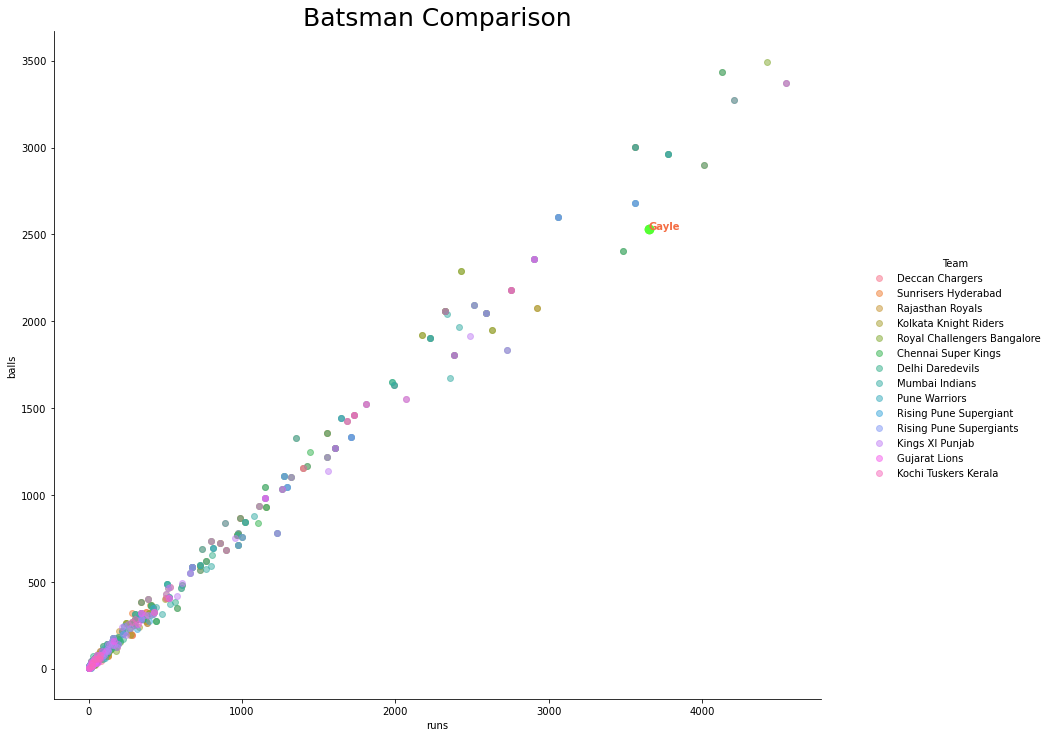

In [27]:
compare_batsman_statistics("runs","balls",'Gayle')

### Runs scored for balls faced by Gayle is higher compared to most batsmen

### Comparing the 4's vs balls for Gayle with others

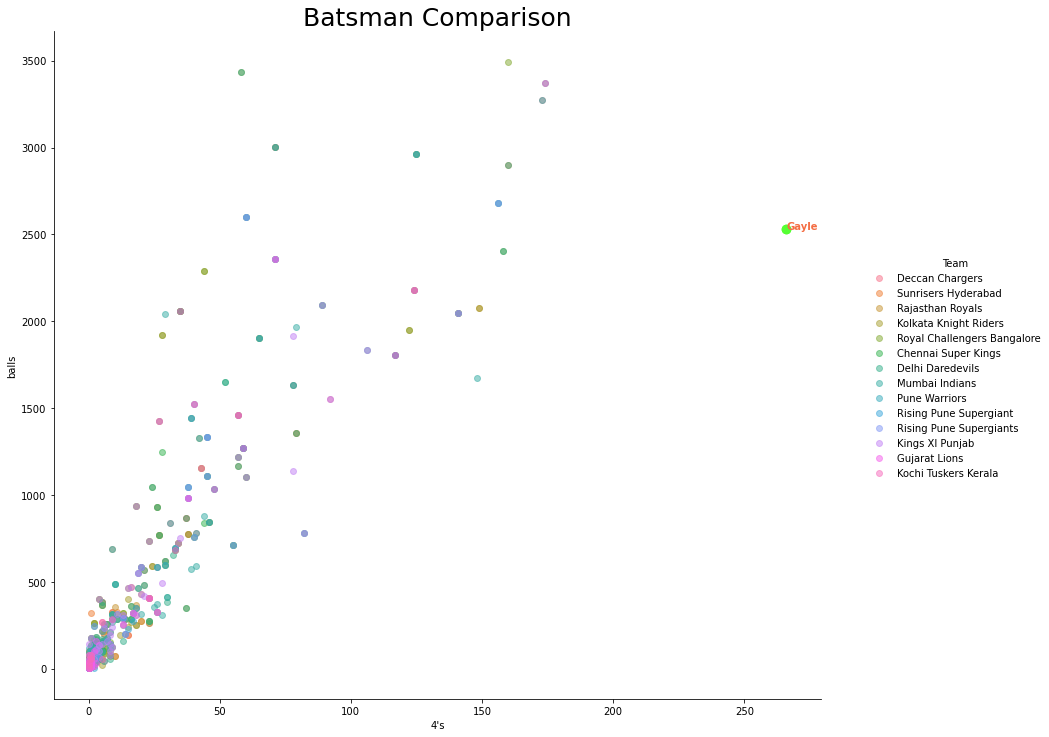

In [28]:
compare_batsman_statistics("4's","balls",'Gayle') 

### Gayle has scored the most number of boundaries with around average number of balls faced. This is a clear indication of a good batsman.

### Comparing the 6's vs 4's for Gambhir with others

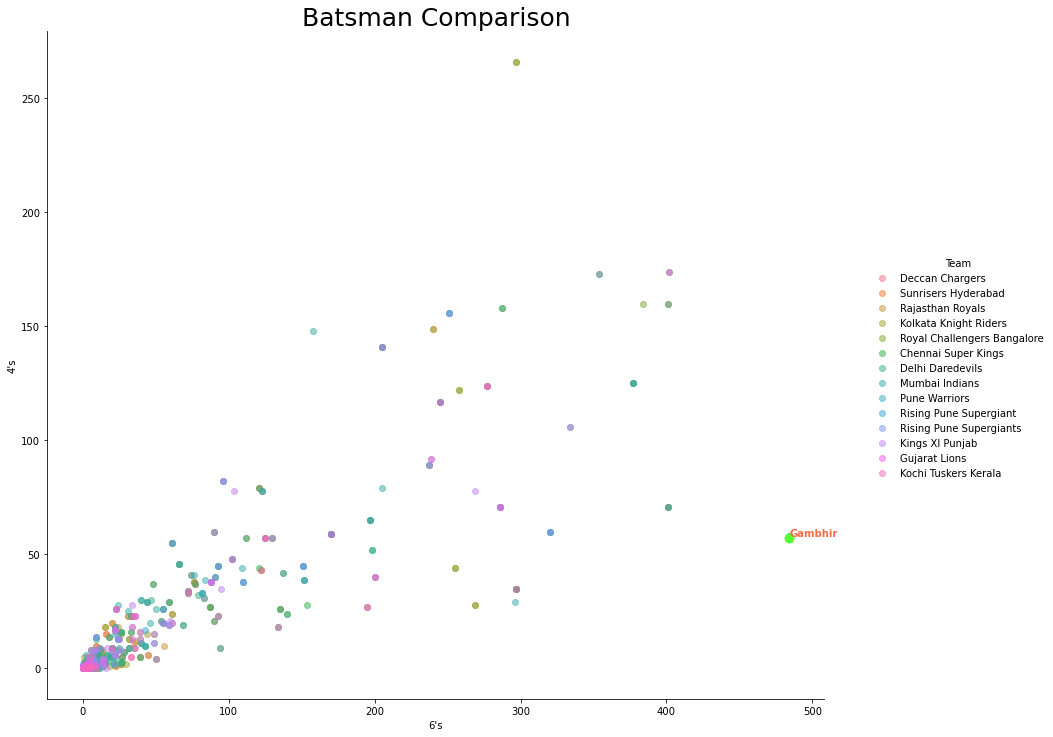

In [29]:
compare_batsman_statistics("6's","4's",'Gambhir') 

### Gambhir has scored the highest number of 6's, however, the number of 4's is near average.

## Define the player statistics on bowling

In [30]:
bowlers=deliveries.groupby('bowler').sum().reset_index()
bowl=deliveries['bowler'].value_counts().reset_index()
bowlers=bowlers.merge(bowl,left_on='bowler',right_on='index',how='left')
bowlers=bowlers[['bowler_x','total_runs','bowler_y']]
bowlers.rename({'bowler_x':'bowler','total_runs':'runs_given','bowler_y':'balls'},axis=1,inplace=True)
bowlers['overs']=(bowlers['balls']//6)
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  
ct=deliveries[deliveries["dismissal_kind"].isin(dismissal_kinds)]
ct=ct['bowler'].value_counts()[:20].reset_index()
bowler_stats=bowlers.merge(ct,left_on='bowler',right_on='index',how='left').dropna()
bowler_stats=bowler_stats[['bowler_x','runs_given','overs','bowler_y']]
bowler_stats.rename({'bowler_x':'bowler','bowler_y':'wickets'},axis=1,inplace=True)
bowler_stats['economy']=(bowlers['runs_given']/bowlers['overs'])
# compare=deliveries.groupby(["match_id", "bowler","bowling_team"])["extra_runs"].sum().reset_index()
# compare=compare.groupby(['bowler','bowling_team'])['extra_runs'].max().reset_index()
# bowler_stats=bowler_stats.merge(compare,left_on='bowler',right_on='bowler',how='outer')
bowler_stats.head(20)

,bowler,runs_given,overs,wickets,economy
5,A Mishra,3305,450,134.0,7.344444
7,A Nehra,2537,329,106.0,7.711246
50,B Kumar,2410,342,111.0,7.046784
88,DJ Bravo,2815,351,122.0,8.019943
103,DW Steyn,2375,359,92.0,6.615599
117,Harbhajan Singh,3453,498,127.0,6.933735
131,JA Morkel,2409,301,85.0,8.003322
197,MM Sharma,2088,261,83.0,8.000000
218,P Kumar,3342,439,90.0,7.612756
229,PP Chawla,3315,432,126.0,7.673611


In [31]:
compare=deliveries.groupby(["match_id", "bowler","bowling_team"])["extra_runs"].sum().reset_index()
compare=compare.groupby(['bowler','bowling_team'])['extra_runs'].max().reset_index()
compare.head()

,bowler,bowling_team,extra_runs
0,A Ashish Reddy,Deccan Chargers,4
1,A Ashish Reddy,Sunrisers Hyderabad,2
2,A Chandila,Rajasthan Royals,2
3,A Choudhary,Royal Challengers Bangalore,4
4,A Flintoff,Chennai Super Kings,1


### Who is the highest wicket taker?

In [32]:
bowler_stats.sort_values("wickets", ascending = False).reset_index(drop=True).head(10)

,bowler,runs_given,overs,wickets,economy
0,SL Malinga,3034,449,154.0,6.757238
1,A Mishra,3305,450,134.0,7.344444
2,Harbhajan Singh,3453,498,127.0,6.933735
3,PP Chawla,3315,432,126.0,7.673611
4,DJ Bravo,2815,351,122.0,8.019943
5,B Kumar,2410,342,111.0,7.046784
6,A Nehra,2537,329,106.0,7.711246
7,R Vinay Kumar,2976,360,103.0,8.266667
8,Z Khan,2860,379,102.0,7.546174
9,R Ashwin,2552,393,100.0,6.493639


### SL Malinga has taken the maximum number of wickets across seasons

### Which bowler has bowled the most overs?

In [33]:
bowler_stats.sort_values("overs", ascending = False).reset_index(drop=True).head(10)

,bowler,runs_given,overs,wickets,economy
0,Harbhajan Singh,3453,498,127.0,6.933735
1,A Mishra,3305,450,134.0,7.344444
2,SL Malinga,3034,449,154.0,6.757238
3,P Kumar,3342,439,90.0,7.612756
4,PP Chawla,3315,432,126.0,7.673611
5,R Ashwin,2552,393,100.0,6.493639
6,Z Khan,2860,379,102.0,7.546174
7,R Vinay Kumar,2976,360,103.0,8.266667
8,DW Steyn,2375,359,92.0,6.615599
9,DJ Bravo,2815,351,122.0,8.019943


### Harbhajan Singh has bowled the most overs

### Which bowler has been the most economical?

In [34]:
bowler_stats.sort_values("economy").reset_index(drop=True).head(10)

,bowler,runs_given,overs,wickets,economy
0,SP Narine,2085,326,95.0,6.395706
1,R Ashwin,2552,393,100.0,6.493639
2,DW Steyn,2375,359,92.0,6.615599
3,SL Malinga,3034,449,154.0,6.757238
4,Harbhajan Singh,3453,498,127.0,6.933735
5,B Kumar,2410,342,111.0,7.046784
6,A Mishra,3305,450,134.0,7.344444
7,PP Ojha,2399,324,89.0,7.404321
8,Z Khan,2860,379,102.0,7.546174
9,P Kumar,3342,439,90.0,7.612756


 ### SP Narine has given the least number of runs for the number of overs bowled

## Compare player's bowling with other bowlers

In [35]:
def compare_bowler_statistics(stat1,stat2,bowler):
    sns.FacetGrid(bowler_stats,height=8).map(mlt.scatter, stat1,stat2, alpha=0.5).add_legend()
    bowls=bowler_stats[bowler_stats['bowler'].str.contains(bowler)].sort_values(by=stat1,ascending=False)
    mlt.scatter(bowls[stat1],bowls[stat2]-1,s=75,c='#55ff33')
    mlt.text(x=bowls[stat1].values[0],y=bowls[stat2].values[0],s=bowler,
            fontsize=10, weight='bold', color='#f46d43')
    mlt.gcf().set_size_inches(15,10)
    mlt.title('Bowler Comparison',size=25)
    mlt.show()

### Compare Harbhajan Singh's bowling with others

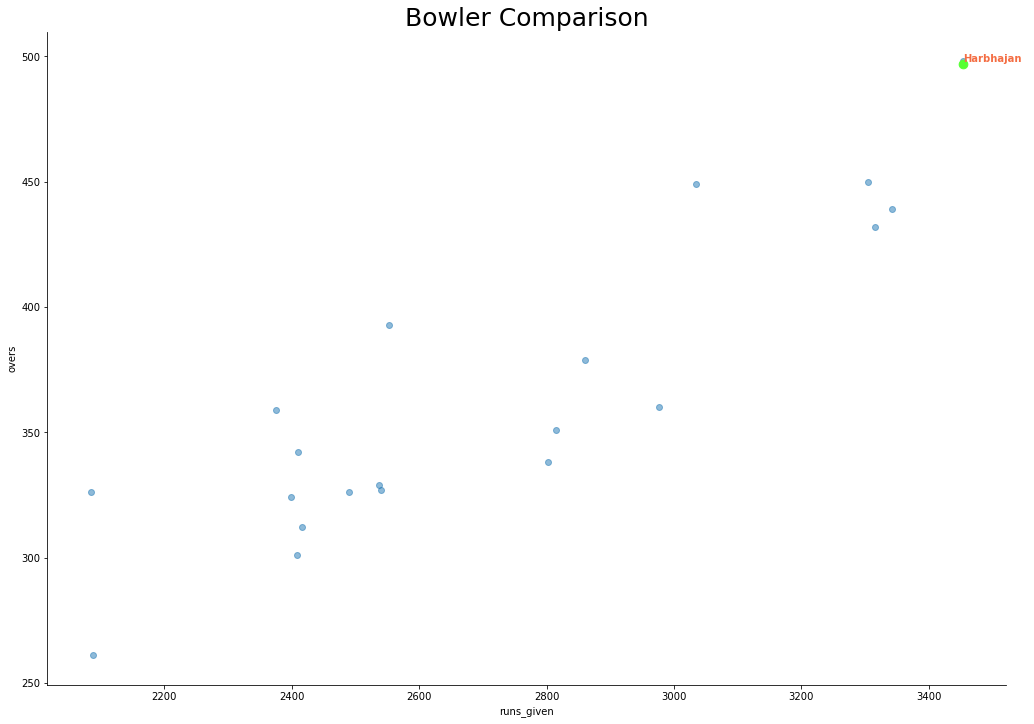

In [36]:
compare_bowler_statistics("runs_given","overs",'Harbhajan') 

### Harbhajan Singh has bowled the most overs, however, his runs given is also the highest

### SP Narine's economy can be compared with others to the wickets taken

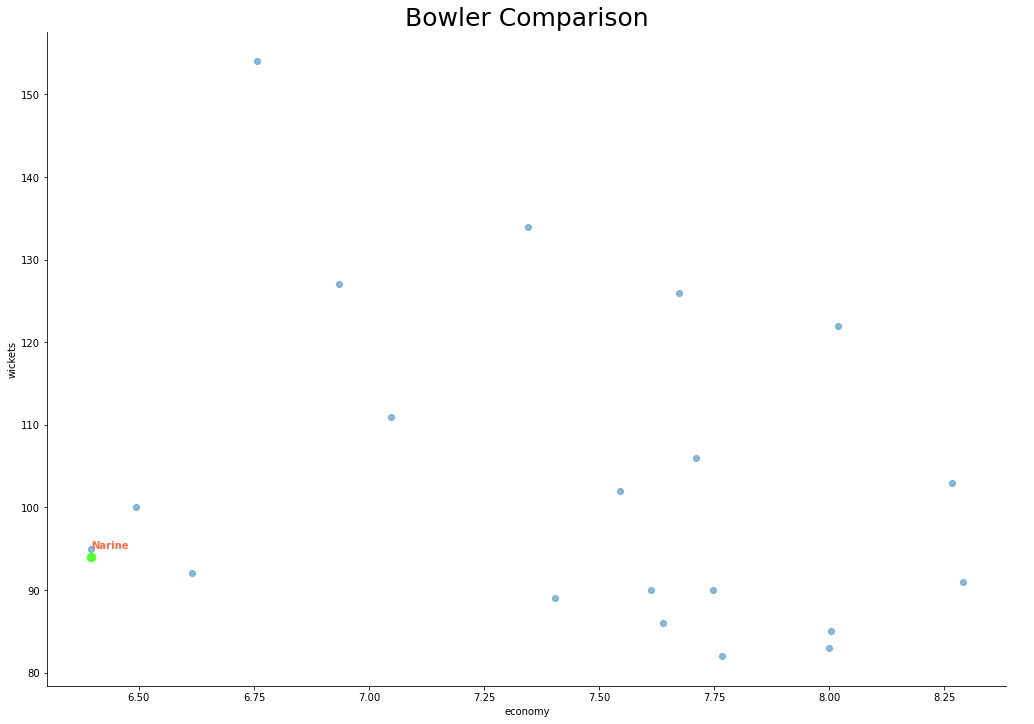

In [37]:
compare_bowler_statistics("economy","wickets",'Narine') 

### Narine's economy is the best, however, the wickets taken by him is lesser than the average

In [38]:
## Some more statistics on the extras given by bowlers and dot balls played by batsman can be added.

In [ ]:
## Player level statistics